In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
train_data = pd.read_csv("./train.csv")
train_data = train_data.fillna(0)

In [3]:
label = train_data['Fare']
cabin = train_data['Age']

In [4]:
y = label
x = cabin

In [5]:
import matplotlib.pyplot as plt

In [28]:
def get_var():
    dk = random.random()*20 - 10
    db = random.random()*20 - 10
    return dk, db

In [29]:
def cal_loss(k, b, x, y):
    loss_val = []
    for xi, yi in zip(x, y):
        loss_val.append((xi * k + b - yi)**2)
    return np.mean(loss_val)

In [30]:
def plot(k, b, x, y):
    y_ = k * x + b
    plt.scatter(x, y)
    plt.plot(x, y_)
    plt.show()

# 第一种方式

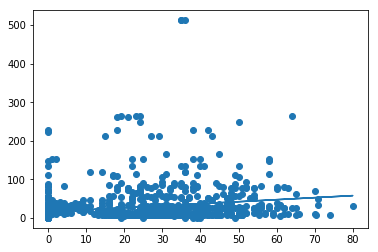

In [31]:
k = random.random()
b = random.random()
loss = 100000
number = 1000
for i in range(number):
    dk, db = get_var()
    k_hub = k + dk
    b_hub = b+ db
    loss_hub = cal_loss(k_hub, b_hub, x, y)
    if loss_hub < loss:
        loss = loss_hub
        k = k_hub
        b = b_hub
plot(k, b, x, y)

# 第二种方式

In [32]:
def direction(flag):
    if flag:
        return 1, 1
    else:
        return random.choice([(1, -1), (-1, 1), (-1, -1)])

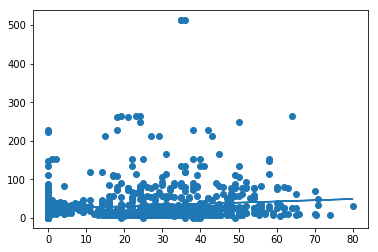

In [33]:
k = random.random()
b = random.random()
loss = 100000
number = 1000
flag = True
for i in range(number):
    re_k, re_b = direction(flag)
    dk, db = get_var()
    k_hub = k + re_k * dk
    b_hub = b+ re_b * db
    loss_hub = cal_loss(k_hub, b_hub, x, y)
    if loss_hub < loss:
        flag = True
        loss = loss_hub
        k = k_hub
        b = b_hub
    else:
        flag = False
plot(k, b, x, y)

# 第三种方式

In [67]:
def mySGD(k, b, x, y):
    x = np.array(x)
    s = np.array(k*x+b-y)
    
    dk = np.matmul(s, x)

    db = np.sum(s)
    return dk, db

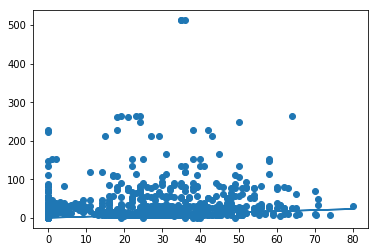

In [78]:
k = random.random()
b = random.random()
loss = 100000
number = 1000

for i in range(number):
    dk, db = mySGD(k, b, x, y) 
    k_hub = k - 0.01 * dk
    b_hub = b - 0.01 * db
    loss_hub = cal_loss(k_hub, b_hub, x, y)
    
    if loss_hub < loss:
        k = k_hub
        b = b_hub
    

plot(k, b, x, y)